# 54. Face detection with OpenCV

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nadia = cv2.imread('DATA/Nadia_Murad.jpg', 0)
denis = cv2.imread('DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('DATA/solvay_conference.jpg', 0)

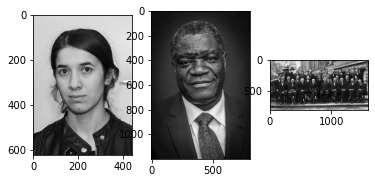

In [3]:
plt.subplot(131)
plt.imshow(nadia, cmap='gray')

plt.subplot(132)
plt.imshow(denis, cmap='gray')

plt.subplot(133)
plt.imshow(solvay, cmap='gray')

In [5]:
# Wanna get detect the frontal face. 
# It might find faces not looking toward the camera, but it doesn't have a good performance for it
face_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_frontalface_default.xml')

In [11]:
def detect_face(img):
    
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img) # x, y, width, height
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)
    
    return face_img

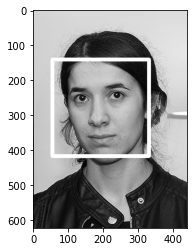

In [12]:
result = detect_face(nadia)
plt.imshow(result, cmap='gray')

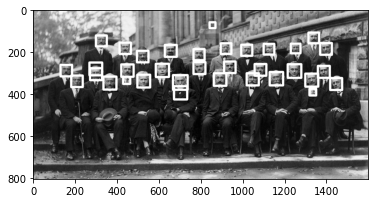

In [13]:
result = detect_face(solvay)
plt.imshow(result, cmap='gray')

In [32]:
# as we see above, some faces are double detected, and some stuff aren't faces
def adjusted_detect_face(img):
    
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5) # x, y, width, height
    
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)
    
    return face_img

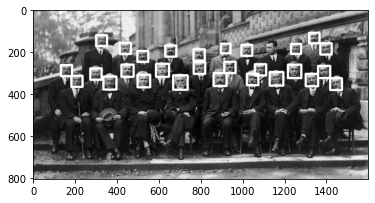

In [33]:
result = adjusted_detect_face(solvay)
plt.imshow(result, cmap='gray')

In [37]:
eyes_cascade = cv2.CascadeClassifier('DATA/haarcascades/haarcascade_eye.xml')

In [40]:
def detect_eyes(img):
    
    face_img = img.copy()
    eyes_rects = eyes_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5) # x, y, width, height
    
    for (x,y,w,h) in eyes_rects:
        cv2.rectangle(face_img, (x,y), (x+w,y+h), (255,255,255), 10)
    
    return face_img

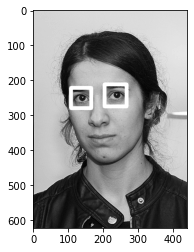

In [41]:
result = detect_eyes(nadia)
plt.imshow(result, cmap='gray')

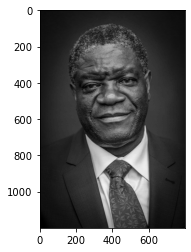

In [42]:
result = detect_eyes(denis)
plt.imshow(result, cmap='gray') # since white of denis's eye is not very white, can't find his eyes. Other reasons too.

In [ ]:
## RUN THE SCRIPT
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read(0)
    
    frame = detect_face(frame)
    
    cv2.imshow('Video face detector', frame)
    
    k = cv2.waitKey(1)
    
    if k == 27:
        break
        
cap.release()
cv2.destroyAllWindows()